Polynomial Model:
Coefficients: [ 3.86326992e-03 -1.34357030e-01  4.72235525e+01  1.74850672e+03]
Model: f(x) = 0.003863x^3 + -0.134357x^2 + 47.223553x^1 + 1748.506723

Exponential Model:
Coefficients: [0.01510133 7.59252407]
Model: f(x) = 1983.313224 * exp(0.015101 * x)


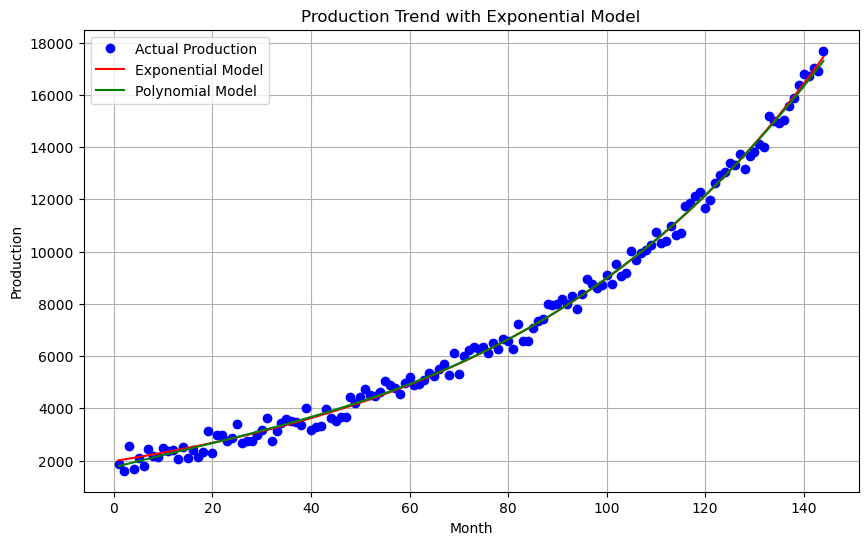

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Read the data from the Excel file
data = pd.read_excel('aolSCdata.xlsx', header=None)

# Extract the production values
production = data.iloc[1].tolist()

# Create a time array for the x-axis
time = np.arange(1, len(production) + 1)

# Polynomial Regression
poly_degree = 3
poly_coeffs = np.polyfit(time, production, poly_degree)
poly_model = np.poly1d(poly_coeffs)
poly_production = poly_model(time)
poly_equation = "f(x) = "
for i in range(poly_degree, -1, -1):
    coeff = poly_coeffs[poly_degree - i]
    if coeff != 0:
        if i == poly_degree:
            poly_equation += "{:.6f}x^{}".format(coeff, i)
        elif i == 0:
            poly_equation += " + {:.6f}".format(coeff)
        else:
            poly_equation += " + {:.6f}x^{}".format(coeff, i)

# Exponential Regression
exp_coeffs = np.polyfit(time, np.log(production), 1, w=np.sqrt(production))
exp_model = lambda x: np.exp(exp_coeffs[1]) * np.exp(exp_coeffs[0] * x)

print("Polynomial Model:")
print("Coefficients:", poly_coeffs)
print("Model: " + poly_equation)
print("")

print("Exponential Model:")
print("Coefficients:", exp_coeffs)
print("Model: f(x) = {:.6f} * exp({:.6f} * x)".format(np.exp(exp_coeffs[1]), exp_coeffs[0]))

# Generate exponential model predictions
exp_production = exp_model(time)

# Plot the data and exponential model
plt.figure(figsize=(10, 6))
# plt.bar(time, production, label='Actual Production')
plt.plot(time, production, 'bo', label='Actual Production')
plt.plot(time, exp_production, 'r-', label='Exponential Model')
plt.plot(time, poly_production, 'g-', label='Polynomial Model')
plt.xlabel('Month')
plt.ylabel('Production')
plt.title('Production Trend with Exponential Model')
plt.legend()
plt.grid(True)
plt.show()
